<a href="https://colab.research.google.com/github/tomaszjednorowski/Projects/blob/main/Decyzja_w_kontek%C5%9Bcie_wyboru_filmu_na_przyk%C5%82adzie_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proces decyzyjny w kontekście wyboru filmu na spotkanie damsko męskie

## Wstęp Teoretyczny



### Rozpatrzenie zagadnienia ze strony medycznej

Idąc za faktami historycznymi należy zauważyć, że po  każdej z pandemii populacja ludzka była zmniejszona o wiele istnień ludzkich.
Przytaczając za [wikipedią](https://pl.wikipedia.org/wiki/Pandemia) wyłącznie wybrane, skrótowe liczby pokazujące rozmiar nagłego kurczenia się populacji pod względem liczebności: 


1.   grypa hiszpanka (1918-1919) - ponad 50 mln zgonów na całym świecie
2.   grypa azjatycka (1957) - ok. 1 mln zgonów na całym świecie
3.   grypa Hong-Kong (1968) - ok. 1 mln zgonów na całym świecie
4.   pandemia grypy A/H1N1 (2009-2010) - 150 - 580 tys. zgonów.

Wnioskując, że za każdym razem populacja ludzka musiała w jakimkolwiek stopniu podlegać odbudowie możemy wesprzeć ten proces patrząc z kontekstu pojedynczej jednostki rodzaju męskiego. 


### Podejście do zagadnienia ze strony technicznej

#### Rozwiązanie systemowe

W dobie zamkniętych kin i teatrów, a także nadchodzącego kryzysu ekonomicznego zmuszeni jesteśmy na organizację zgromadzenia dwuosobowego damsko - męskiego w jak najbardziej optymalny i ekonomiczny sposób. W tym celu posłużymy się wyborem tematyki spotkania za pomocą odpowiedniego wyselekcjonowania filmów posługując się rankingiem IMDB. Ufając temu rankingowi możemy liczyć, że wcześniej wspomniane zgromadzenie odbęcie się z dobrym odbiorem danego osobnika przez przedstawicielkę płci przeciwnej.

#### Funkcje wykorzystane w programie

Ranking IMDB podany jest w formie tablerycznej. Używamy do tego dedykowanej biblioteki Pandas, a dokładnie funkcji pandas.read_csv("foofoo.csv").

W kolejnych etapach dokonujemy filtracji danych, sortowania wg. wybranego przez nas wzorca, oraz wyliczenia reprezentatywnych konkretnych liczb dla całego zbioru danych: mediany liczby oddanych głosów (por. niżej), oraz średniej wartości oceny filmu.

## Proces decyzyjny i realizacja kodu programu




W procesie decyzyjnym bardzo ważnym kryterium jest ocena. Każdy film ma swoją średnią ocenę uzyskaną od widzów. Interesuje nas więc np. w którym kwartylu znajduje się jego ocena, jaka ocena jest najbardziej popularna, jaka jest średnia naszych ocen.

Bardzo ważne jest jednak kryterium liczby oddanych głosów. Należy przypomnieć, że my szukamy filmu, który da największe statystycznie szanse na udany wieczór, więc im większa jest liczba głosów - tym lepiej. Poznajmy medianę liczby oddanych głosów.

In [ ]:
#loaded library, which we need to solve problem with tabular data from CSV
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
movies = pd.read_csv('RankingIMDB.csv')

In [ ]:
movies.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [ ]:
movies.Votes.median()

110799.0

In [ ]:
movies.Rating.describe(include=['object'])

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

Niezależna eskpertka mieszkająca z autorem niniejszego sprawozdania wydała następującą ekspertyzę:
1.   Warto obejrzeć nowy film. Nowe filmy to te wyprodukowane po 2012 roku.
2.   Kobiety najbardziej lubią komedię romantyczną.

Dodatkowo decydujemy się rozpatrywać tylko te rekordy z filmami, które zebrały ocenę wyższą od średniej ocen, a głosów oddano więcej niż wynosi mediana. Budżet filmowy zostawiamy, ale celem walki z powszechnym materializem nie będziemy dokonywali filtracji i pod tym względem. Warto jednak zobaczyć różnice.



In [ ]:
#movies.loc - filtres columns
#Rating >6.7 AND movies don't olders, votes more of medians,
our_movies = movies.loc[:,['Title', 'Director', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)']][movies.Rating>6.7][movies.Year>2012][movies.Votes>110799][movies.Genre.str.contains("Romance")]
our_movies.sort_values('Rating')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Title,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions)
876,Warm Bodies,Jonathan Levine,2013,98,6.9,193579,66.36
9,Passengers,Morten Tyldum,2016,116,7.0,192177,100.01
226,The Lobster,Yorgos Lanthimos,2015,119,7.1,121313,8.70
807,The Spectacular Now,James Ponsoldt,2013,95,7.1,115751,6.85
395,The Age of Adaline,Lee Toland Krieger,2015,112,7.2,112288,42.48
137,The Great Gatsby,Baz Luhrmann,2013,143,7.3,386102,144.81
57,Me Before You,Thea Sharrock,2016,106,7.4,113322,56.23
357,The Theory of Everything,James Marsh,2014,123,7.7,299718,35.89
260,Birdman or (The Unexpected Virtue of Ignorance),Alejandro González Iñárritu,2014,119,7.8,440299,42.34
338,The Fault in Our Stars,Josh Boone,2014,126,7.8,271301,124.87


In [ ]:
%matplotlib inline

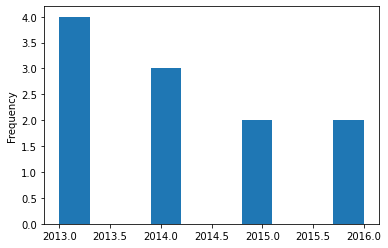

In [ ]:
our_movies.Year.plot(kind='hist')

Rok 2013 obfitował w najwięcej udanych filmów jak widać na naszym histogramie. Możemy uznać go za dobrą monetę i jeszcze bardziej odseparować dane.

In [ ]:
our_movies_2013 = our_movies.sort_values('Rating')[our_movies.Year==2013]
our_movies_2013

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Title,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions)
876,Warm Bodies,Jonathan Levine,2013,98,6.9,193579,66.36
807,The Spectacular Now,James Ponsoldt,2013,95,7.1,115751,6.85
137,The Great Gatsby,Baz Luhrmann,2013,143,7.3,386102,144.81
173,Her,Spike Jonze,2013,126,8.0,390531,25.56


In [ ]:
directors = movies.Director.value_counts()
directors["Jonathan Levine"]
directors["James Ponsoldt"]
directors["Baz Luhrmann"]
directors["Spike Jonze"]

1

In [ ]:
direct = movies.Director.value_counts()

## Wnioski końcowe

1. Z 1000 rekordów filmów w 12 kolumnach parametru do wyboru udało nam się zrobić 11 rekordów i 7 kolumn bardziej stargetowanych przez nas informacji, by później zredukować tę liczbę do 4, dając wskazania na konkretne dwa spośród nich. Już same dane tabelaryczne wspierają nasz proces decyzyjny.

In [ ]:
movies.shape

(1000, 12)

In [ ]:
our_movies.shape

(11, 7)

In [ ]:
our_movies_2013.shape

(4, 7)

2. Najwięcej komedii romantycznych, które osiągnęły ilość głosów powyżej mediany, ocenę powyżej średniej filmów Rankingu IMDB powstało w roku 2013.

3. **Dla dobra celu naszego spotkania należy pochylić się nad filmami reżysera Baza Luhrmanna, oraz Jonathana Levine'a. Warto wybrać film 	Warm Bodies, albo The Great Gatsby. Wybór pomiędzy tymi dwoma typami pozostaje naszej subiektywnej ocenie opartej guście.**